In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import xml.etree.ElementTree as ElementTree

from Project2.Face import Face

In [5]:
def load_data(annotations, images):
    data = {"file" : [], "faces":[]}
    for filename in os.listdir(annotations):
        root = ElementTree.parse(annotations + filename).getroot()
        if root.tag != 'annotation':
            # this is a bad file, we can't process it
            print(f"Unable to process {filename}, skipping it")
            pass
        filename = root[1].text
        img = cv2.imread(images + filename)
        # stupid opencv bgr
        img = gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # dims of image file
        x, y = int(root[2][0].text), int(root[2][1].text)
        faces = []
        for face in root.findall('object'):
            xmin, ymin, xmax, ymax = int(face[5][0].text), int(face[5][1].text), int(face[5][2].text), int(face[5][3].text)
            mat = img[ymin:ymax, xmin:xmax]
            f = Face(face[0].text, xmin, ymin, xmax, ymax, mat)
            faces.append(f)
        data['file'].append(filename)
        data['faces'].append(faces)
    return pd.DataFrame.from_dict(data)

In [7]:
df = load_data("./Project2/annotations/", "./Project2/images/")

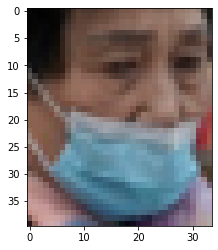

In [31]:
mat = df.head()['faces'][0][2].mat
plt.imshow(mat)
plt.show()